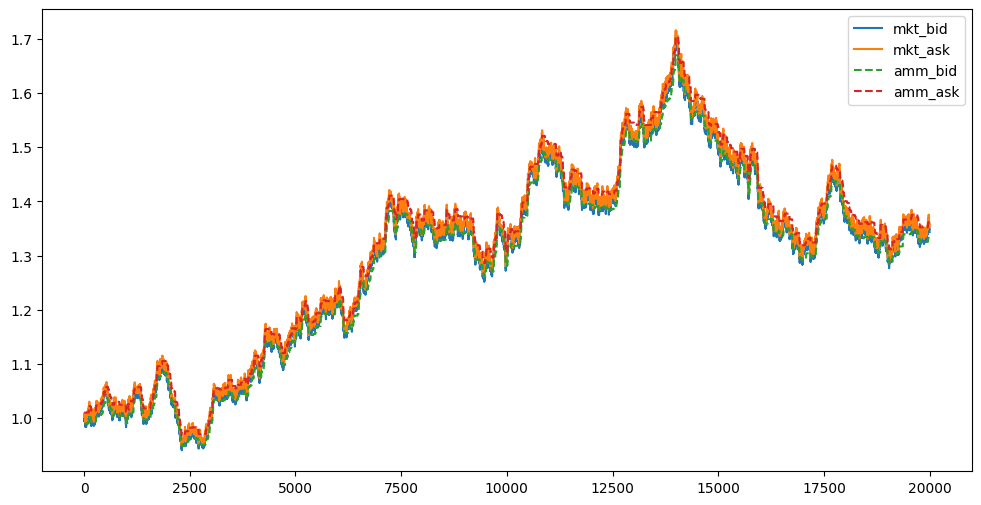

In [1]:
import os
import sys
# add /home/shiftpub/Dynamic_AMM as a path
sys.path.append(os.path.join(os.getcwd(), '..'))
from env.amm import AMM
from env.oracle import OracleSimulator
from env.trader import Arbitrager

from matplotlib import pyplot as plt


oracle = OracleSimulator(spread=1, sigma=0.5)
amm = AMM(distribute=True, fee=0.01)
trader = Arbitrager(amm, oracle)

mkt_bids = []
mkt_asks = []
amm_bids = []
amm_asks = []
swap_infos = []


for _ in range(20000):
    mkt_ask, mkt_bid = oracle.get_price()
    amm_ask, amm_bid = amm.get_price()
    mkt_bids.append(mkt_bid)
    mkt_asks.append(mkt_ask)
    amm_bids.append(amm_bid)
    amm_asks.append(amm_ask)
    
    swap_info = trader.swap()
    swap_infos.append(swap_info)
    oracle.next()

plt.figure(figsize=(12, 6))
plt.plot(mkt_bids, label='mkt_bid')
plt.plot(mkt_asks, label='mkt_ask')
plt.step(range(len(amm_bids)), amm_bids, label='amm_bid', linestyle='--', where='pre')
plt.step(range(len(amm_asks)), amm_asks, label='amm_ask', linestyle='--', where='pre')
plt.legend()
plt.show()
    

In [2]:
import numpy as np

# choose swap info where xr != 0
swap_infos = [swap_info for swap_info in swap_infos if swap_info['xr'] != 0]
# select 'amm_ask', 'amm_bid', 'mkt_ask', 'mkt_bid', 'prev_amm_ask', 'prev_amm_bid', 'xr'
swap_infos = [{key: swap_info[key] for key in ['amm_ask', 'amm_bid', 'mkt_ask', 'mkt_bid', 'prev_amm_ask', 'prev_amm_bid', 'xr']} for swap_info in swap_infos]
# check whether if xr<0 and amm_ask is very close to mkt_bid or xr>0 and amm_bid is very close to mkt_ask
# check how many times this does not hold
count = 0
for swap_info in swap_infos:
    if swap_info['xr'] < 0 and np.abs(swap_info['amm_ask'] - swap_info['mkt_bid']) > 1e-10:
        count += 1
    if swap_info['xr'] > 0 and np.abs(swap_info['amm_bid'] - swap_info['mkt_ask']) > 1e-10:
        count += 1

print(count)

0


impermanent_gains: {'IG': [2465.092106819153, 2476.1852445602417, 2487.1558001041412, 2498.0037772655487, 2508.729180574417, 2519.332013964653, 2529.8122814893723, 2540.1699870824814, 2550.4051349163055, 2560.51772916317, 2570.50777387619, 2580.375272989273, 2590.1202305555344, 2599.7426508665085, 2609.242537856102, 2618.61989569664, 2627.874728322029, 2637.007039785385, 2646.0168340206146, 2654.90411567688, 2663.6688883304596, 2672.3111559152603, 2680.8309230804443, 2689.2281934022903, 2697.5029711723328, 2705.655260324478, 2713.6850650310516, 2721.5923894643784, 2729.3772374391556, 2737.0396132469177, 2744.579520702362, 2751.996964097023, 2759.291947364807, 2766.4644746780396, 2773.514549970627, 2780.442177414894, 2787.2473611831665, 2793.9301050901413, 2800.490413427353, 2806.928290128708, 2813.2437393665314, 2819.4367648363113, 2825.5073709487915, 2831.4555619955063, 2837.281341791153, 2842.9847140312195, 2848.565683245659, 2854.0242533683777, 2859.360428571701, 2864.5742126703262,

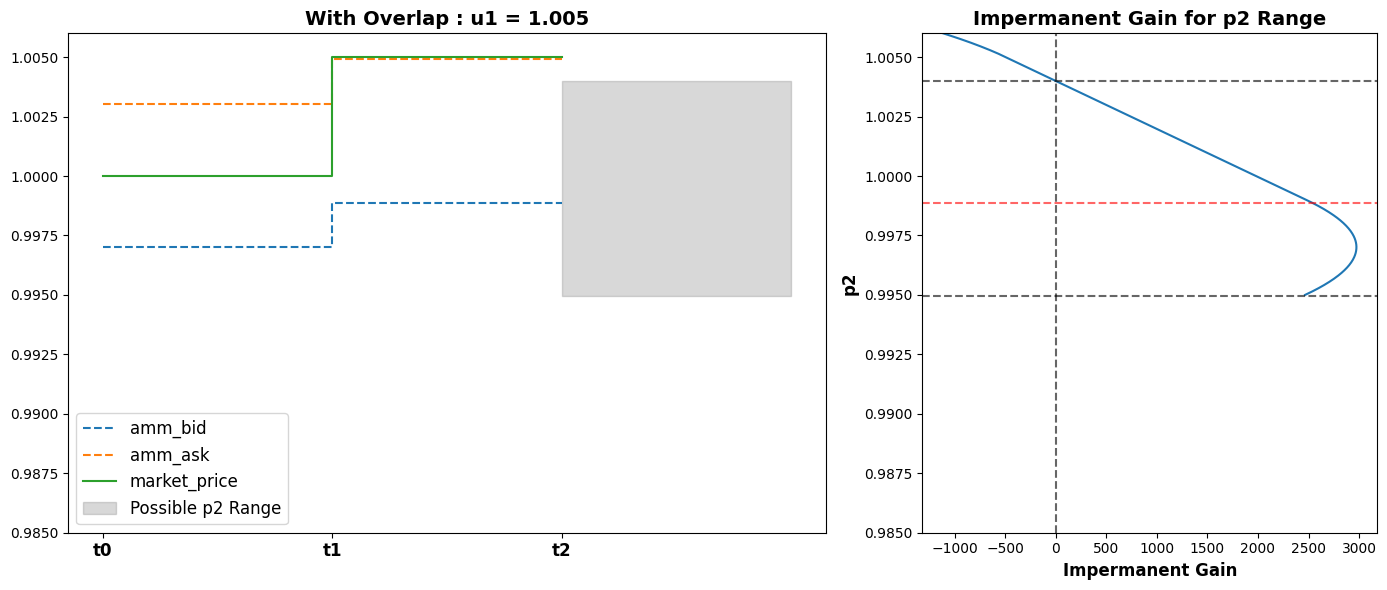

In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Add path for module import
sys.path.append(os.path.join(os.getcwd(), '..'))
from env.amm import AMM
from env.oracle import OracleSimulator
from env.trader import Arbitrager

# Initialize lists to store prices and impermanent loss
amm_bids = []
amm_asks = []
market_bids = []
market_asks = []
ils = []


# Initialize the AMM, Oracle, and Trader
oracle = OracleSimulator(spread=0, sigma=1)
amm = AMM(distribute=False)
trader = Arbitrager(amm, oracle)
# Calculate range for p2 based on the given formula
fee_rate = amm.f
u1 = 1.005
# u2_lower = (1 - fee_rate) / u1
u2_lower = 0.990
a = 1 - fee_rate
num1 = np.sqrt((a+1)**2 - 4*a*(1-u1*a))
u2_upper = (np.sqrt((a+1)**2 - 4*a*(1-u1*a)) - (a-1)) / (2*u1*a)
# u2_upper = (np.sqrt(u1 * (1 - fee_rate)) - 1) / (u1 - np.sqrt(u1 / (1 - fee_rate)))
p2_upper = u1 * u2_upper
p2_lower = u1 * u2_lower
p2_values = np.linspace(p2_lower, p2_upper, 500)  # Sample 50 points within the p2 range

# Calculate impermanent gain (IG) for a range of p2 values
# u2_values = np.linspace(u2_lower, u2_upper, 500)  # Sample 50 points within the p2 range
u2_values = np.linspace(0.990/u1, 1.006/u1, 500)  # Sample 50 points within the p2 range
impermanent_gains = {
    'IG': [],
    'p2': []
}

for u2 in u2_values:
    oracle = OracleSimulator(spread=0, sigma=1)
    amm = AMM(distribute=False)
    trader = Arbitrager(amm, oracle)
    # Record initial prices and calculate initial impermanent loss
    amm_ask, amm_bid = amm.get_price()
    market_ask, market_bid = oracle.get_price()
    amm_bids.append(amm_bid)
    amm_asks.append(amm_ask)
    market_bids.append(market_bid)
    market_asks.append(market_ask)
    ils.append(0)
    amm_bids.append(amm_bid)
    amm_asks.append(amm_ask)
    market_bids.append(market_bid)
    market_asks.append(market_ask)
    ils.append(0)

    # Step 1: Market price changes by u1
    u1 = 1.005
    oracle.pr *= u1
    trader.swap()
    amm_ask, amm_bid = amm.get_price()
    market_ask, market_bid = oracle.get_price()
    amm_bids.append(amm_bid - 0.0001)
    amm_asks.append(amm_ask - 0.0001)
    market_bids.append(market_bid)
    market_asks.append(market_ask)
    ils.append((oracle.pr * amm.lr + oracle.ps * amm.ls) - (oracle.pr * amm.initial_lr + oracle.ps * amm.initial_ls))

    oracle.pr *= u2
    trader.swap()
    # Calculate IG based on the provided formula
    IG = (oracle.pr * amm.lr + oracle.ps * amm.ls) - (oracle.pr * amm.initial_lr + oracle.ps * amm.initial_ls)
    p2 = u1 * u2
    impermanent_gains['IG'].append(IG)
    impermanent_gains['p2'].append(p2)
print(f"impermanent_gains: {impermanent_gains}")
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 0.6]})

# Left subplot with shaded area for valid p2 range
amm_bids[3] = None
amm_asks[3] = None
market_bids[3] = None
plt.sca(axes[0])
plt.step(range(4), amm_bids[:4], label='amm_bid', linestyle='--', where='pre')
plt.step(range(4), amm_asks[:4], label='amm_ask', linestyle='--', where='pre')
plt.step(range(4), market_bids[:4], label='market_price', linestyle='-', where='pre')

# Shade the area for valid p2 range
axes[0].fill_between([2, 3], p2_lower, p2_upper, color='gray', alpha=0.3, label='Possible p2 Range')
plt.xticks([0, 1, 2], ["t0", "t1", "t2"], fontsize=12, fontweight='bold')
# set y limit from 0.99 to 1.06
plt.ylim(0.985, 1.006)
axes[0].legend(fontsize=12)
axes[0].set_title("With Overlap : u1 = 1.005", fontsize=14, fontweight='bold')

# Right subplot: bar chart of impermanent gains for each p2
plt.sca(axes[1])
# u2_values = np.linspace(0.995/u1, 1.006/u1, 500)  # Sample 50 points within the p2 range
axes[1].plot(impermanent_gains['IG'], impermanent_gains['p2'])
axes[1].set_xlabel("Impermanent Gain", fontsize=12, fontweight='bold')
axes[1].set_ylabel("p2", fontsize=12, fontweight='bold')
plt.ylim(0.985, 1.006)
axes[1].set_title("Impermanent Gain for p2 Range", fontsize=14, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='--', alpha=0.6)
axes[1].axhline(y=p2_lower, color='black', linestyle='--', alpha=0.6)
axes[1].axhline(y=p2_upper, color='black', linestyle='--', alpha=0.6)
axes[1].axhline(y=amm_bids[2], color='red', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
